In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd 

from matplotlib import pyplot as plt
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir =  '/media/cjw/Data/Faces/'
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-10-11-11-14-42_faces_0/checkpoint-2018-10-11-11-14-42/"
meta = 'autoencoder-2048x-24000.meta'
path =  "autoencoder-2048x-24000"

In [6]:
tf.reset_default_graph()
sess = tf.Session()
saver = tf.train.import_meta_graph(cpdir + meta)


In [8]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    print(op.name)
    print('------')

Placeholder
------
Placeholder_1
------
encoder/filter_00/kernel/Initializer/truncated_normal/shape
------
encoder/filter_00/kernel/Initializer/truncated_normal/mean
------
encoder/filter_00/kernel/Initializer/truncated_normal/stddev
------
encoder/filter_00/kernel/Initializer/truncated_normal/TruncatedNormal
------
encoder/filter_00/kernel/Initializer/truncated_normal/mul
------
encoder/filter_00/kernel/Initializer/truncated_normal
------
encoder/filter_00/kernel
------
encoder/filter_00/kernel/Assign
------
encoder/filter_00/kernel/read
------
encoder/filter_00/bias/Initializer/zeros
------
encoder/filter_00/bias
------
encoder/filter_00/bias/Assign
------
encoder/filter_00/bias/read
------
encoder/filter_00/dilation_rate
------
encoder/filter_00/Conv2D
------
encoder/filter_00/BiasAdd
------
encoder/mul/y
------
encoder/mul
------
encoder/Maximum
------
encoder/dropout/keep_prob
------
encoder/dropout/Shape
------
encoder/dropout/random_uniform/min
------
encoder/dropout/random_unif

------
discriminator/discrim01/kernel/read
------
discriminator/discrim01/bias/Initializer/zeros/shape_as_tensor
------
discriminator/discrim01/bias/Initializer/zeros/Const
------
discriminator/discrim01/bias/Initializer/zeros
------
discriminator/discrim01/bias
------
discriminator/discrim01/bias/Assign
------
discriminator/discrim01/bias/read
------
discriminator/discrim01/MatMul
------
discriminator/discrim01/BiasAdd
------
discriminator/mul/y
------
discriminator/mul
------
discriminator/Maximum
------
discriminator/discrim02/kernel/Initializer/truncated_normal/shape
------
discriminator/discrim02/kernel/Initializer/truncated_normal/mean
------
discriminator/discrim02/kernel/Initializer/truncated_normal/stddev
------
discriminator/discrim02/kernel/Initializer/truncated_normal/TruncatedNormal
------
discriminator/discrim02/kernel/Initializer/truncated_normal/mul
------
discriminator/discrim02/kernel/Initializer/truncated_normal
------
discriminator/discrim02/kernel
------
discrimina

------
gradients/encoder/Maximum_4_grad/tuple/group_deps
------
gradients/encoder/Maximum_4_grad/tuple/control_dependency
------
gradients/encoder/Maximum_4_grad/tuple/control_dependency_1
------
gradients/encoder/mul_4_grad/Shape
------
gradients/encoder/mul_4_grad/Shape_1
------
gradients/encoder/mul_4_grad/BroadcastGradientArgs
------
gradients/encoder/mul_4_grad/Mul
------
gradients/encoder/mul_4_grad/Sum
------
gradients/encoder/mul_4_grad/Reshape
------
gradients/encoder/mul_4_grad/Mul_1
------
gradients/encoder/mul_4_grad/Sum_1
------
gradients/encoder/mul_4_grad/Reshape_1
------
gradients/encoder/mul_4_grad/tuple/group_deps
------
gradients/encoder/mul_4_grad/tuple/control_dependency
------
gradients/encoder/mul_4_grad/tuple/control_dependency_1
------
gradients/AddN_7
------
gradients/encoder/filter_04/BiasAdd_grad/BiasAddGrad
------
gradients/encoder/filter_04/BiasAdd_grad/tuple/group_deps
------
gradients/encoder/filter_04/BiasAdd_grad/tuple/control_dependency
------
gradien

------
discriminator/discrim03/kernel/Adam
------
discriminator/discrim03/kernel/Adam/Assign
------
discriminator/discrim03/kernel/Adam/read
------
discriminator/discrim03/kernel/Adam_1/Initializer/zeros/shape_as_tensor
------
discriminator/discrim03/kernel/Adam_1/Initializer/zeros/Const
------
discriminator/discrim03/kernel/Adam_1/Initializer/zeros
------
discriminator/discrim03/kernel/Adam_1
------
discriminator/discrim03/kernel/Adam_1/Assign
------
discriminator/discrim03/kernel/Adam_1/read
------
discriminator/discrim03/bias/Adam/Initializer/zeros
------
discriminator/discrim03/bias/Adam
------
discriminator/discrim03/bias/Adam/Assign
------
discriminator/discrim03/bias/Adam/read
------
discriminator/discrim03/bias/Adam_1/Initializer/zeros
------
discriminator/discrim03/bias/Adam_1
------
discriminator/discrim03/bias/Adam_1/Assign
------
discriminator/discrim03/bias/Adam_1/read
------
Adam_1/learning_rate
------
Adam_1/beta1
------
Adam_1/beta2
------
Adam_1/epsilon
------
Adam_1/u

In [9]:
saver.restore(sess, cpdir + path)

INFO:tensorflow:Restoring parameters from /media/cjw/Data/cyto/Checkpoints/2018-10-11-11-14-42_faces_0/checkpoint-2018-10-11-11-14-42/autoencoder-2048x-24000


In [41]:
a = sess.graph.get_operation_by_name('decoder/Sigmoid')
v = a.values()

In [68]:
mh = np.memmap(datadir + 'faces.mm', dtype=np.int32, mode='r', offset=0, shape=(4))
print(mh)
del mh
mm = np.memmap(datadir + 'faces.mm', dtype=np.float32, mode='r', offset=128,shape=(405,300,300,3))

[405 300 300   3]


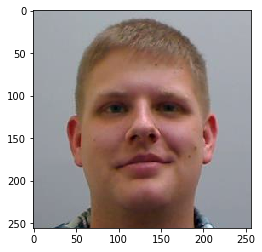

(0.0, 1.0)

In [86]:
d = (300-256)//2
p = mm[8, d:-d, d:-d, :]
p = np.expand_dims(p, axis=0)
vv = v[0].eval({'Placeholder:0':p}, sess)
plt.imshow(p[0])
plt.show()
p.min(), p.max()

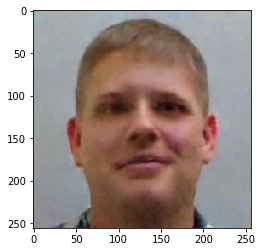

In [87]:
plt.imshow(vv[0,:,:,:])
plt.show()